# 4. Evaluating a machine learning model

There are mainly 3 ways to evaluate a machine learning model:
1. The built-in `score` method of the model
2. The `scoring` parameter
3. Problem-specific metrics (e.g. accuracy, precision, recall, F1 score, ROC AUC, etc.)

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
%matplotlib inline

## 4.1 Evaluating a model using the built-in `score` method

In [2]:
heart_disease = pd.read_csv("./assets/csv/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [19]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2) 

clf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
clf.score(X_train,y_train)

1.0

In [21]:
clf.score(X_test, y_test)

0.8524590163934426

Test for regression

In [23]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [25]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["target"] = pd.Series(california.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model = RandomForestRegressor()

X = california_df.drop("target", axis=1)
y = california_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

## 4.2 Evaluating a model using the `scoring` parameter

In [27]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
clf.score(X_test, y_test)

0.8524590163934426

In [29]:
# Cross validation tries to train and test on same data but by splitting it into different samples

cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [30]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [32]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = cross_val_score(clf, X, y, cv=5).mean()

# Compare the two
clf_single_score, clf_cross_val_score


(0.8524590163934426, np.float64(0.8248087431693989))

### 4.2.1 Classification model evaluation

1. Accuracy
2. Area under the ROC curve (ROC AUC)
3. Confusion matrix
4. Classification report

In [ ]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [35]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score(clf, X, y, cv=5)) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 80.18%


** Area under the receiver operating characteristic curve (AUC/ROC) **

* Area under curve (AUC)
* ROC curve

* True positive rate (TPR) = Recall = Sensitivity
* False positive rate (FPR) = 1 - Specificity
* True negative rate (TNR) = Specificity
* False negative rate (FNR) = 1 - Recall

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

In [39]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10], y_probs[:10]

(array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13]),
 array([[0.11, 0.89],
        [0.53, 0.47],
        [0.09, 0.91],
        [0.39, 0.61],
        [0.23, 0.77],
        [0.01, 0.99],
        [0.61, 0.39],
        [0.45, 0.55],
        [0.11, 0.89],
        [0.87, 0.13]]))

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


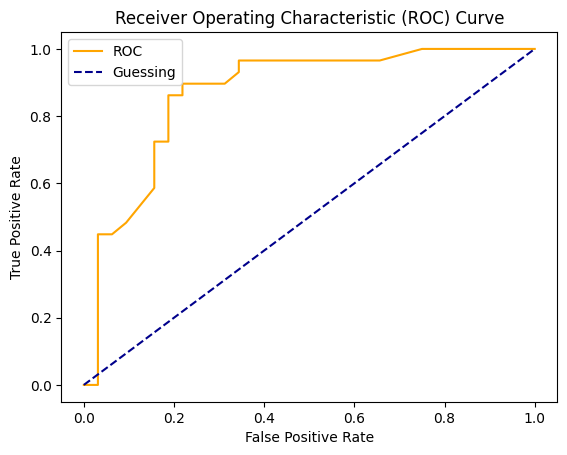

In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)